In [577]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# 표준화
from sklearn.preprocessing import StandardScaler
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

# kidney 데이터 불러오기

In [578]:
kidney = pd.read_csv("../Data/kidney_disease.csv")
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


- Age(numerical) - age in years       
- Blood Pressure(numerical) - bp in mm/Hg     
- Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)        
- Albumin(nominal) - al - (0,1,2,3,4,5)       
- Sugar(nominal) - su - (0,1,2,3,4,5)     
- Red Blood Cells(nominal) - rbc - (normal,abnormal)      
- Pus Cell (nominal) - pc - (normal,abnormal)     
- Pus Cell clumps(nominal) - pcc - (present,notpresent)       
- Bacteria(nominal) - ba - (present,notpresent)       
- Blood Glucose Random(numerical) - bgr in mgs/dl     
- Blood Urea(numerical) -bu in mgs/dl     
- Serum Creatinine(numerical) - sc in mgs/dl      
- Sodium(numerical) - sod in mEq/L        
- Potassium(numerical) - pot in mEq/L     
- Hemoglobin(numerical) - hemo in gms     
- Packed Cell Volume(numerical)       
- White Blood Cell Count(numerical) - wc in cells/cumm        
- Red Blood Cell Count(numerical) - rc in millions/cmm        
- Hypertension(nominal) - htn - (yes,no)      
- Diabetes Mellitus(nominal) - dm - (yes,no)      
- Coronary Artery Disease(nominal) - cad - (yes,no)       
- Appetite(nominal) - appet - (good,poor)     
- Pedal Edema(nominal) - pe - (yes,no)        
- Anemia(nominal) - ane - (yes,no)        
- Class (nominal)- class - (ckd,notckd)       

### 데이터 info 확인

In [579]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

-  컬럼 이름 및 개수(행, 컬럼) 확인

In [580]:
print("컬럼 이름", kidney.columns)
print("행 및 컬럼 개수 : ",kidney.shape)

컬럼 이름 Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
행 및 컬럼 개수 :  (400, 26)


> 행의 개수는 400개지만 info에서 보았을 때 not-null count를 보았을 때 그 수가 다른 행 수가 있으므로 결측치가 있다는 것을 예상할 수 있다.

In [581]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [582]:
kidney.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


### id 컬럼 제거 - index 값과 같으므로 없어도 무관하다.

In [583]:
kidney.drop('id', axis=1, inplace=True)
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


### 결측치 있는 행  모두 삭제 후 사용할 수 있는 데이터인지 확인

In [584]:
kidney1 = kidney

In [585]:
kidney1.dropna(how='any', inplace=True)
kidney1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


- 결측치 제거 후 데이터 인포 확인

In [586]:
kidney1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [587]:
kidney1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


- index 재정렬

In [588]:
kidney1 = kidney1.reset_index(drop=True)
kidney1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


### 숫자 데이터 중 object를 float으로 변환

In [589]:
kidney1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [590]:
kidney1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [591]:
kidney1.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [592]:
kidney1 = kidney1.astype({'pcv':'float'})
kidney1 = kidney1.astype({'pcv':'float'})
kidney1 = kidney1.astype({'wc':'float'})
kidney1 = kidney1.astype({'rc':'float'})

In [593]:
kidney1.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### 2가지 유형의 데이터만 가지고 있는 컬럼 0과 1로 변환하기

In [594]:
object_cols = [cols for cols in kidney1.columns if kidney1[cols].dtype == object]
object_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [595]:
for cols in object_cols:
    print(kidney1[cols].unique())

['normal' 'abnormal']
['abnormal' 'normal']
['present' 'notpresent']
['notpresent' 'present']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['poor' 'good']
['yes' 'no']
['yes' 'no']
['ckd' 'notckd']


In [596]:
kidney1[object_cols[0]].replace({'normal':1, 'abnormal':0}, inplace=True)
kidney1[object_cols[1]].replace({'normal':1, 'abnormal':0}, inplace=True)
kidney1[object_cols[2]].replace({'present':1, 'notpresent':0}, inplace=True)
kidney1[object_cols[3]].replace({'present':1, 'notpresent':0}, inplace=True)
kidney1[object_cols[4]].replace({'yes':1, 'no':0}, inplace=True)
kidney1[object_cols[5]].replace({'yes':1, 'no':0}, inplace=True)
kidney1[object_cols[6]].replace({'yes':1, 'no':0}, inplace=True)
kidney1[object_cols[7]].replace({'good':1, 'poor':0}, inplace=True)
kidney1[object_cols[8]].replace({'yes':1, 'no':0}, inplace=True)
kidney1[object_cols[9]].replace({'yes':1, 'no':0}, inplace=True)
kidney1[object_cols[10]].replace({'ckd':1, 'notckd':0}, inplace=True)


In [597]:
kidney1.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.886076,0.816456,0.088608,0.075949,131.341772,...,41.917722,8475.949367,4.891772,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,...,9.105164,3126.880181,1.019364,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,9.000000,3800.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,97.000000,...,37.500000,6525.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,115.500000,...,44.000000,7800.000000,4.950000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,131.750000,...,48.000000,9775.000000,5.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [598]:
kidney1.corr(method='spearman')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.037987,-0.320591,0.305127,0.260754,-0.187434,-0.224297,0.129691,0.119732,0.327795,...,-0.229980,0.196249,-0.276252,0.386088,0.343536,0.292621,-0.193759,0.245270,0.099159,0.335599
bp,0.037987,1.000000,-0.138334,0.259642,0.223782,-0.266863,-0.167092,0.166355,0.156727,0.155268,...,-0.257574,-0.046345,-0.181864,0.249922,0.182938,0.180597,-0.112647,0.093762,0.266322,0.258589
sg,-0.320591,-0.138334,1.000000,-0.669149,-0.475890,0.459350,0.529720,-0.381991,-0.429846,-0.365259,...,0.528986,-0.214414,0.548829,-0.588536,-0.566627,-0.353066,0.469379,-0.538266,-0.373300,-0.697504
al,0.305127,0.259642,-0.669149,1.000000,0.613792,-0.553731,-0.778927,0.512763,0.502123,0.461893,...,-0.712350,0.248360,-0.665054,0.826841,0.719894,0.419746,-0.603288,0.611110,0.569539,0.970148
su,0.260754,0.223782,-0.475890,0.613792,1.000000,-0.305664,-0.440324,0.296147,0.423569,0.524640,...,-0.416047,0.212782,-0.428878,0.638544,0.622641,0.464622,-0.343444,0.457403,0.267706,0.585078
rbc,-0.187434,-0.266863,0.459350,-0.553731,-0.305664,1.000000,0.498959,-0.168592,-0.273177,-0.307745,...,0.393957,-0.121666,0.383122,-0.442400,-0.511777,-0.293269,0.418639,-0.282868,-0.209797,-0.586391
pc,-0.224297,-0.167092,0.529720,-0.778927,-0.440324,0.498959,1.000000,-0.600092,-0.481227,-0.364975,...,0.621360,-0.106131,0.617767,-0.666767,-0.636288,-0.384223,0.528435,-0.606234,-0.545380,-0.775388
pcc,0.129691,0.166355,-0.381991,0.512763,0.296147,-0.168592,-0.600092,1.000000,0.415033,0.217821,...,-0.427740,0.072531,-0.436896,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
ba,0.119732,0.156727,-0.429846,0.502123,0.423569,-0.273177,-0.481227,0.415033,1.000000,0.273472,...,-0.362033,0.168707,-0.339436,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
bgr,0.327795,0.155268,-0.365259,0.461893,0.524640,-0.307745,-0.364975,0.217821,0.273472,1.000000,...,-0.412346,0.095542,-0.419977,0.420295,0.509574,0.355006,-0.250901,0.331835,0.122603,0.448888


In [599]:
table = kidney1.pivot_table(index=['classification'], columns=['al'], aggfunc='size')
# aggfunc='size' : data값의 크기를 기준으로 집계한다. (데이터 합계가 아니라 count 해줌)
table

al,0.0,1.0,2.0,3.0,4.0
classification,,,,,
0,115.0,NaN,NaN,NaN,NaN
1,1.0,3.0,9.0,15.0,15.0


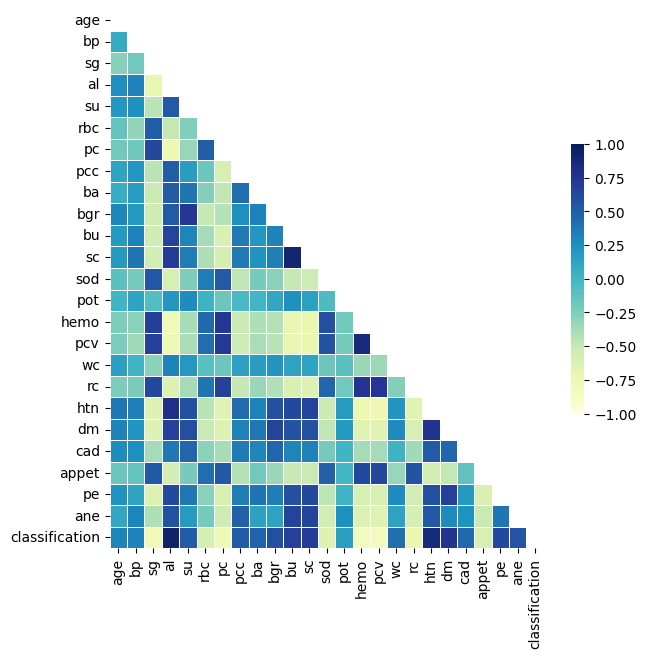

In [600]:
df = kidney1.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'YlGnBu', 
            # annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 로지스틱 회귀

In [601]:
len(kidney1.columns)

25

In [602]:
featureColumn = kidney1.columns[0:24]

In [603]:
# Feature, Target
data = kidney1[featureColumn].to_numpy()
target = kidney1['classification'].to_numpy()

In [604]:
# Train, Test
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, random_state=42)

In [605]:
print("Train :", train_input.shape)
print("Test :", test_input.shape)

Train : (126, 24)
Test : (32, 24)


In [606]:
# 정규화
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [607]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print("Train Score :", lr.score(train_scaled, train_target))
print("Test Score :", lr.score(test_scaled, test_target))

Train Score : 1.0
Test Score : 1.0


In [608]:
print(lr.coef_, lr.intercept_)

[[ 0.25427446  0.32167901 -0.55825359  0.98554646  0.24497975 -0.67646863
  -0.35428504  0.30891561  0.14446974  0.31527629  0.32273202  0.35125543
  -0.41552858 -0.0579855  -0.44708059 -0.42677297  0.61801791 -0.16117631
   0.46888665  0.17621432  0.14353973 -0.12734491  0.13291779  0.13919507]] [-2.1678345]


## 결정트리

In [609]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
print("Train Score :", dt.score(train_input, train_target))
print("Test Score :", dt.score(test_input, test_target))

Train Score : 1.0
Test Score : 1.0


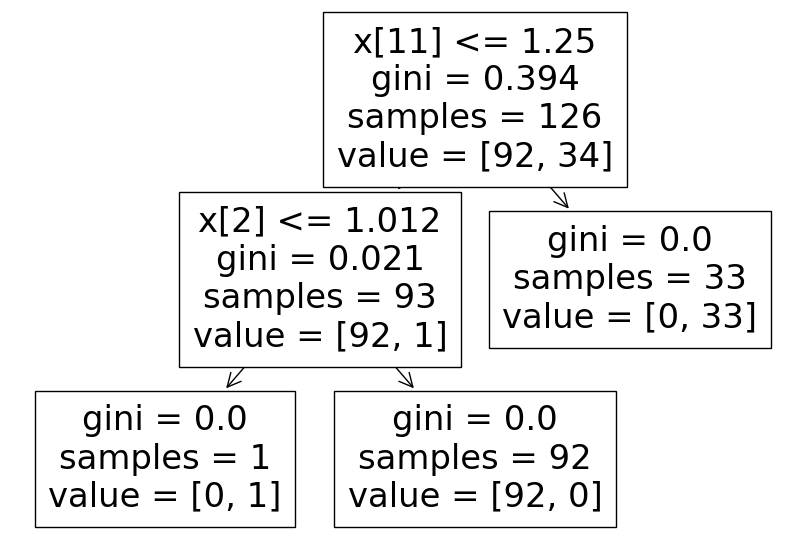

In [610]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### 가지치기

In [611]:
dt = DecisionTreeClassifier(max_depth=1)   # 3층 넘어감
dt.fit(train_input, train_target)

print("Train :", dt.score(train_input, train_target))
print("Test :", dt.score(test_input, test_target))

Train : 0.9920634920634921
Test : 1.0


> train data가 너무 커서 과대적합이다. 가지치기를 해도 과대적합

## Extra tree

In [612]:
from sklearn.ensemble import ExtraTreesClassifier
# 교차 검증
from sklearn.model_selection import cross_validate

et = ExtraTreesClassifier(n_jobs=-1)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


In [613]:
et.fit(train_input, train_target)
et.feature_importances_

array([1.21496540e-04, 8.92098082e-03, 9.86757572e-02, 2.14140520e-01,
       2.71507364e-02, 3.58321078e-02, 9.65064676e-02, 1.32194407e-02,
       4.05588867e-03, 6.34149380e-03, 2.45715582e-02, 2.57760727e-02,
       4.70604507e-03, 1.30188958e-03, 5.03902010e-02, 5.35906006e-02,
       6.32909530e-03, 3.33108249e-02, 1.36371286e-01, 8.50178701e-02,
       5.77640347e-03, 2.02882647e-02, 3.66460287e-02, 1.09589696e-02])

### Gradient Boostring

In [614]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.992


In [615]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.992


In [616]:
gb.fit(train_input, train_target)
gb.feature_importances_

array([ 0.00000000e+00,  0.00000000e+00,  1.96432152e-03,  5.40336939e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.19746314e-18,  3.83127283e-16,  4.19814863e-01,
        3.64748161e-05,  0.00000000e+00,  5.14490329e-05,  1.19419116e-05,
        7.23132912e-03,  1.01449136e-03,  9.91633066e-03,  1.37764622e-02,
        0.00000000e+00,  0.00000000e+00,  5.84539674e-03,  0.00000000e+00])

### 히스토그램기반 gradient boostring

In [617]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.984


### XGboost

In [618]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    tree_method = 'hist',
    use_label_encoder = False,
    eval_metrics = 'logloss',   #히스토그램 모듈(히스토그램 그레디언트 부스팅) 가져다 쓰겠다. 
)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.

1.0 0.984


## purmutation importance

In [619]:
from sklearn.inspection import permutation_importance

xgb.fit(train_input, train_target)
result = permutation_importance(xgb, train_input, train_target, n_repeats=10, n_jobs=-1)
result.importances_mean

[17:10:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_metrics" } are not used.



array([0.        , 0.        , 0.        , 0.05873016, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00396825,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [620]:
gb.fit(train_input, train_target)
result = permutation_importance(gb, train_input, train_target, n_repeats=10, n_jobs=-1)
result.importances_mean

array([0.        , 0.        , 0.        , 0.00634921, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00634921, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

array([0.00000000e+00, 0.00000000e+00, 4.13849350e-04, 5.76003719e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.77929820e-16, 1.68015951e-16, 3.84148084e-01,
       1.57586178e-03, 0.00000000e+00, 2.77820480e-04, 4.09484269e-05,
       1.71980524e-02, 7.15032150e-04, 1.79854448e-02, 1.01299240e-03,
       0.00000000e+00, 0.00000000e+00, 6.28195555e-04, 0.00000000e+00])

In [621]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_input, train_target)
clf.score(test_input, test_target)

0.8125

In [622]:
# 정규화
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [623]:
clf = svm.SVC()
clf.fit(train_scaled, train_target)
clf.score(test_scaled, test_target)

1.0